# Advanced Numerical Analysis

## Exercise 32

*Write a Matlab program for solving the initial value problem*
$$\begin{cases}
y'' + 101 y' + 100 y = 0 \\
y(0) = 3,\ y'(0) = -102
\end{cases}$$

*after transformation to a system of first order differential equations with*

$\textrm{(i)} \quad$ *Euler’s method,*  
$\textrm{(ii)} \quad$ *the second half step method,*  
$\textrm{(iii)} \quad$ *the third half step method.*

*Use stepsizes* $\frac{1}{8}, \frac{1}{64},$ *and* $\frac{1}{256}$ *and compute until* $t = 3.$ *Compare the results
to the exact solution* $y(t) = 2 e^{−t} + e^{−100t}$ *and explain the findings.*

$$ $$

Written as a system of first order differential equations the given initial value problem is equivalent to
$$\begin{cases}
y'(t) = F(t, y(t)), \quad t\in [0,3] \\
y(0) = (3, -102)^\top
\end{cases}$$
for $y=(y_1,y_2)^\top$ and $F(t, y(t)) = \big(\begin{smallmatrix} 0 & 1 \\ -100 & -101 \end{smallmatrix}\big) y(t).$

Defining all of the required methods:

In [169]:
function y = Euler_method(F, y0, t)    
    m = length(y0);
    n = length(t);
    y = zeros(m, n);
    y(:,1) = y0;
    
    for k = 1 : n - 1
        h = t(k+1) - t(k);
        y(:,k+1) = y(:,k) + h * F(t(k), y(:,k));
    endfor
endfunction


function y = Heun_method(F, y0, t)    
    m = length(y0);
    n = length(t);
    y = zeros(m, n);
    y(:,1) = y0;
    
    for k = 1 : n - 1
        h = t(k+1) - t(k);
        x = y(:,k) + h * F(t(k), y(:,k));
        y(:,k+1) = y(:,k) + h/2 * (F(t(k), y(:,k)) + F(t(k+1), x));
    endfor
endfunction


function y = midpoint_rule(F, y0, t, tolerance = 1e-8, max_iterations = 1000)
    m = length(y0);
    n = length(t);
    y = zeros(m, n);
    y(:,1) = y0;
    
    for k = 1 : n - 1
        h = t(k+1) - t(k);
        
        # function for Newton's method
        function retval = fcn(f)
            retval = F(t(k) + h/2, y(:,k) + h/2 * f) - f;
        endfunction
        
        options.TolX = tolerance;
        options.MaxIter = max_iterations;
        f = fsolve(@fcn, y(:,k), options);
        
        y(:,k+1) = y(:,k) + h * f;
    endfor
endfunction

Defining all of the given data:

In [170]:
interval = [0, 3];
step_sizes = [1/8, 1/64, 1/256];
y0 = [3; -102];

function y_prime = F(t, y)
    % function of the given ODE
    y_prime = [[0, 1];[-100, -101]] * y;
endfunction

function y = exact(t)
    % exact solution of the ODE
    y = 2*exp(-t) + exp(-100*t);
endfunction

Calculating approximations using the methods from above to all given step sizes:

In [171]:
steps = round(1 ./ step_sizes);
interval_length = interval(2) - interval(1);

for i = 1 : length(steps)
    intervals{i} = linspace(interval(1), interval(2), interval_length * steps(i) + 1);
    exact_vals{i} = exact(intervals{i});
    euler_vals{i} = Euler_method(@F, y0, intervals{i})(1,:);
    heun_vals{i} = Heun_method(@F, y0, intervals{i})(1,:);
    mid_vals{i} = midpoint_rule(@F, y0, intervals{i})(1,:);
endfor

#### Comparison for $h = \frac{1}{8}$

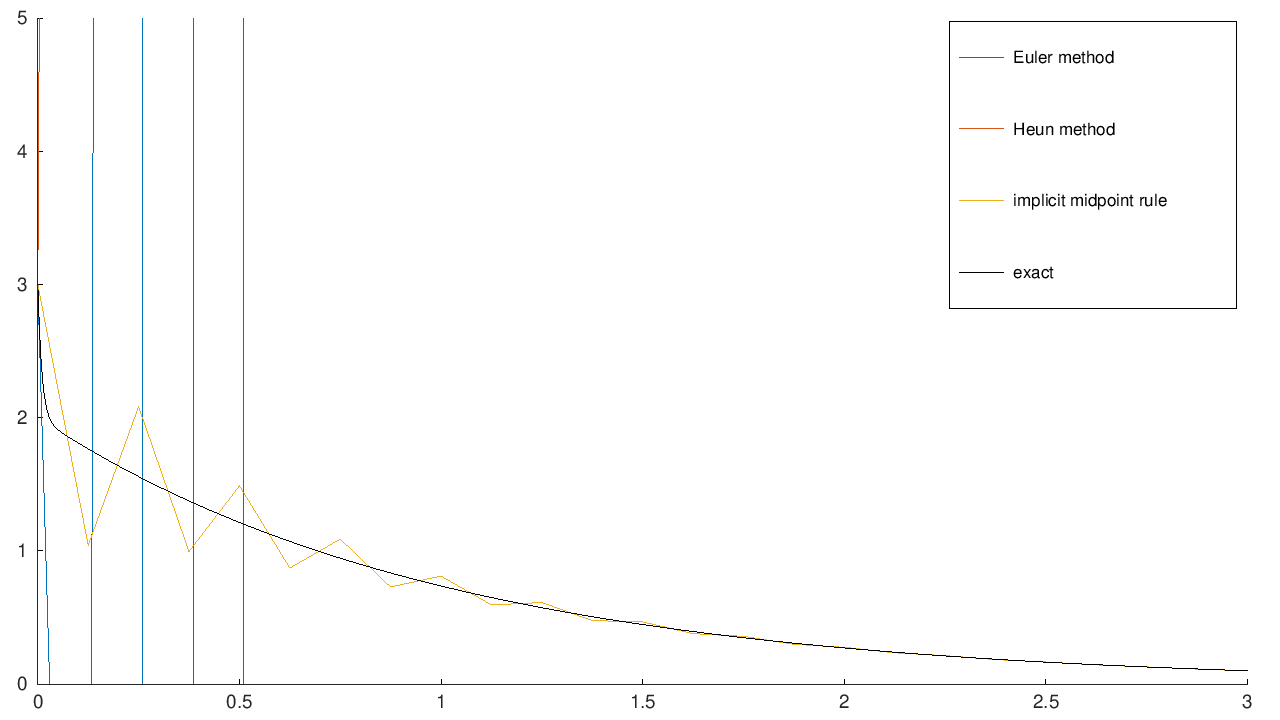

In [185]:
i = 1;
hold on;
plot(intervals{i}, euler_vals{i})
plot(intervals{i}, heun_vals{i})
plot(intervals{i}, mid_vals{i})
plot(intervals{3}, exact_vals{3}, "k")
axis([0, 3, 0, 5])
legend("Euler method", "Heun method", "implicit midpoint rule", "exact");

Euler's method oscillates heavily and diverges to infinity. The method of Heun also diverges to infinity but without oscillating. The implicit midpoint rule also oscillates but tends to the exact solution privided that one uses a good solver for the implicit equation. These results are to be expected since the given problem is stiff and the implicit method is B-stable.

#### Comparison for $h = \frac{1}{64}$

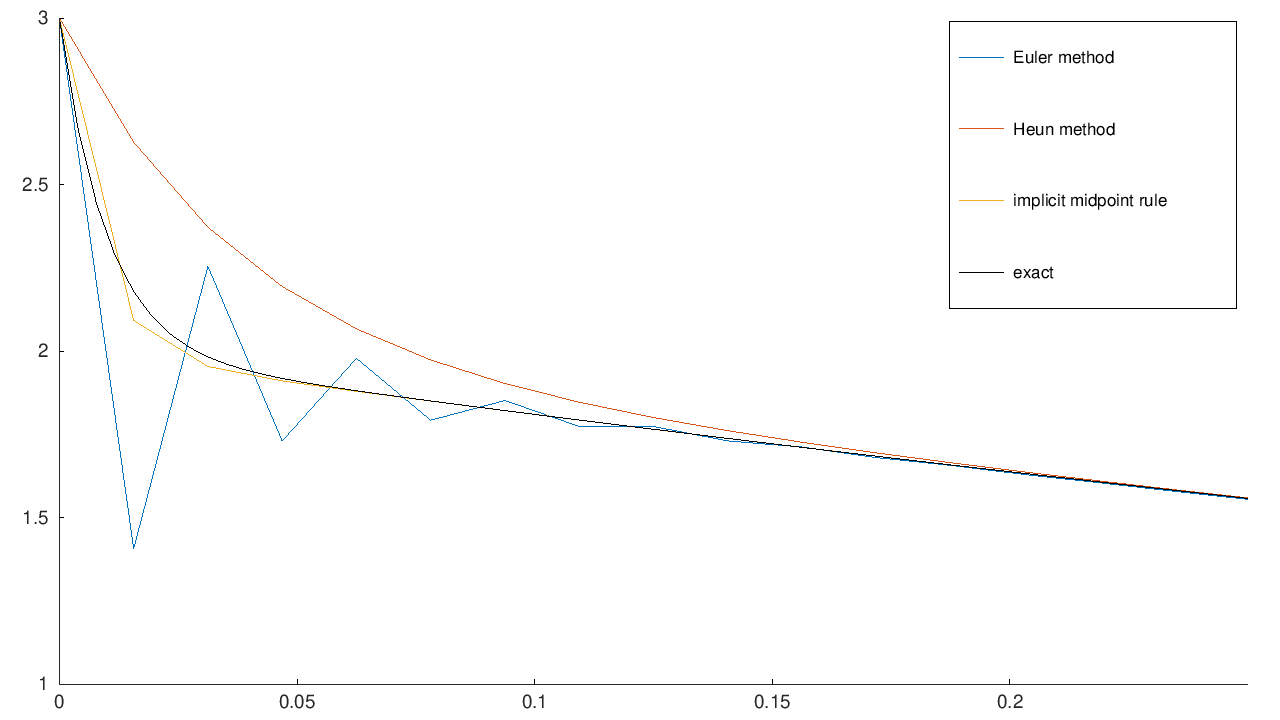

In [186]:
i = 2;
hold on;
plot(intervals{i}, euler_vals{i})
plot(intervals{i}, heun_vals{i})
plot(intervals{i}, mid_vals{i})
plot(intervals{3}, exact_vals{3}, "k")
axis([0, 0.25, 1, 3])
legend("Euler method", "Heun method", "implicit midpoint rule", "exact");

Euler's method still oscillates but now tends to the exact solution. Heun's method is much better than before and the implicit midpoint rule is already quite close to the exact solution.

#### Comparison for $h = \frac{1}{256}$

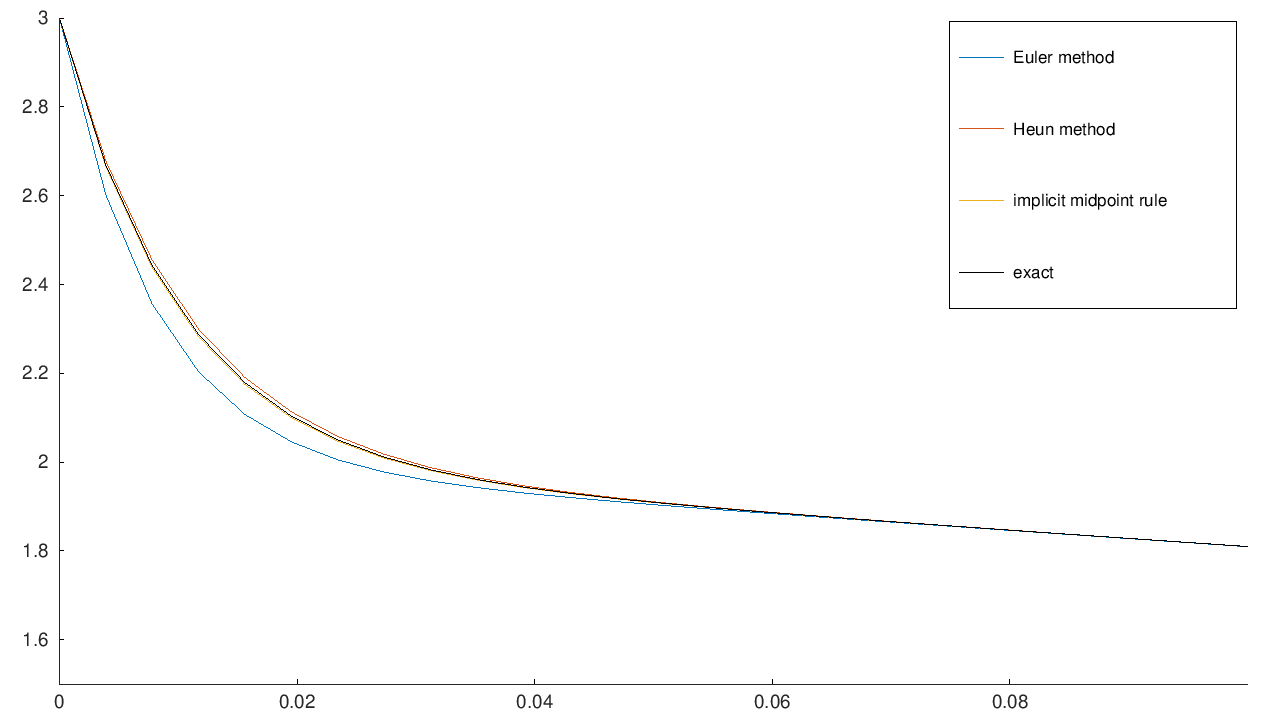

In [187]:
i = 3;
hold on;
plot(intervals{i}, euler_vals{i})
plot(intervals{i}, heun_vals{i})
plot(intervals{i}, mid_vals{i})
plot(intervals{3}, exact_vals{3}, "k")
axis([0, 0.1, 1.5, 3])
legend("Euler method", "Heun method", "implicit midpoint rule", "exact");

Now Euler's method produces acceptable approximations. Heun's method can be considered quite close to the exact solution while the implicit midpoint rule is almost indistinguishable from it on this plot.

Calculating the maximum error of each method for different step sizes:

In [182]:
steps = 10.^[1 : 5];

errs_euler = [];
errs_heun = [];
errs_mid = [];

for i = 1 : length(steps)
    t = 0 : 1/steps(i) : 3;
    vals_exact = exact(t);
    errs_euler(i) = max(abs(vals_exact - Euler_method(@F, y0, t)(1,:)));
    errs_heun(i) = max(abs(vals_exact - Heun_method(@F, y0, t)(1,:)));
    errs_mid(i) = max(abs(vals_exact - midpoint_rule(@F, y0, t)(1,:)));
endfor

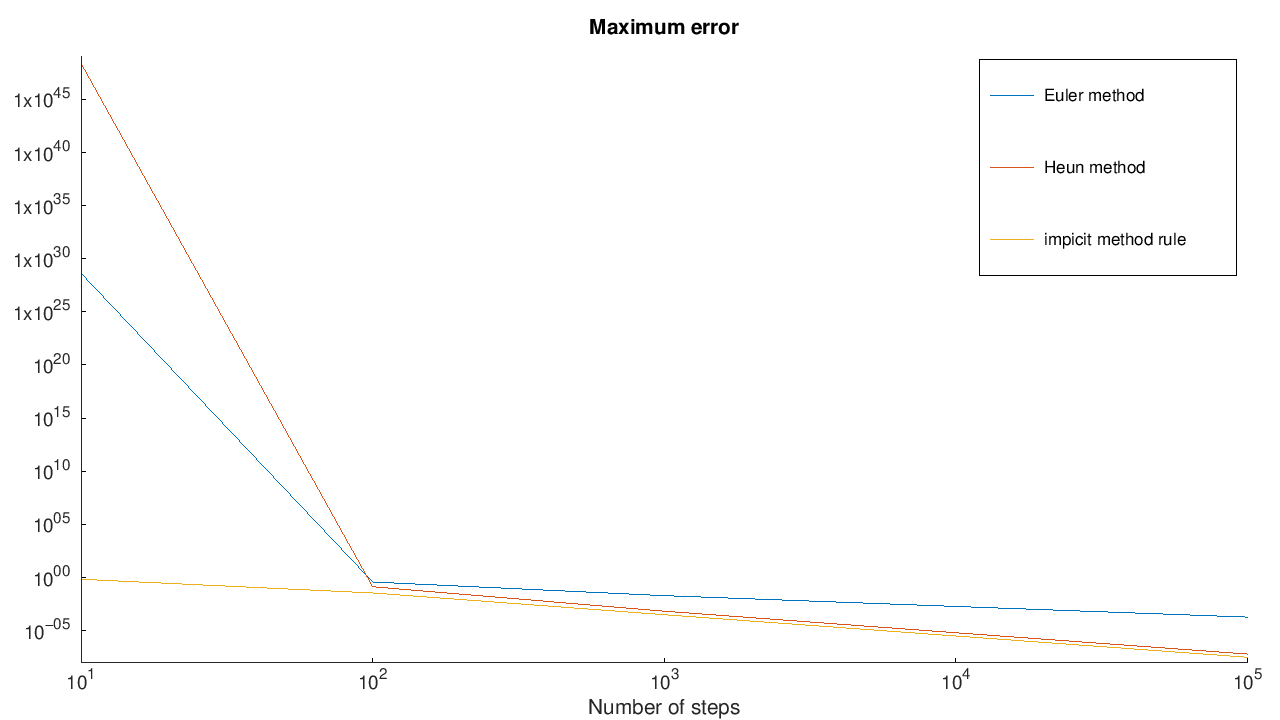

In [189]:
hold on;
loglog(steps, errs_euler)
loglog(steps, errs_heun)
loglog(steps, errs_mid)
axis([steps(1), steps(end)]);
set(gca, "ytick", 10.^[-5 : 5 : 50]);
title("Maximum error");
xlabel("Number of steps");
legend("Euler method", "Heun method", "impicit method rule");

In [184]:
disp("Approximate order of convergence:")
printf("%.4f Euler method\n", log(errs_euler(end) / errs_euler(end-1)) / log(steps(end-1) / steps(end)))
printf("%.4f Heun method\n", log(errs_heun(end) / errs_heun(end-1)) / log(steps(end-1) / steps(end)))
printf("%.4f implicit midpoint rule\n", log(errs_mid(end) / errs_mid(end-1)) / log(steps(end-1) / steps(end)))

Approximate order of convergence:
1.0016 Euler method
2.0029 Heun method
2.0007 implicit midpoint rule


After the initial issues at very large step sizes Euler's and Heun's method settle to more reasonable errors. Heun's method is actually not far behind the implicit midpoint rule and converges at approximately the same rate. But in general one should choose the implicit method for its better stability regarding stiff problems. The approximate orders of convergence also seem to conform very well to the theoretical ones.